In [1]:
#import modules
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import math

In [2]:
#parse PDB
df = pd.DataFrame(columns=["Bead_no","Bead_name","Residue","Chain_id","Residue_num","x","y","z",
                           "mass","charge","isOverhang"])
Bead_no = []
Bead_name = []
Residue = []
Chain_id = []
Residue_num = []
x = []
y = []
z = []
mass = []
charge = []
with open("1rpu_CG.pdb") as f:
    for line in f.read().split("\n"):
        if(line.split()[0] == "TER"):
            break
        Bead_no.append(line.split()[1])
        Bead_name.append(line.split()[2])
        Residue.append(line.split()[3])
        Chain_id.append(line.split()[4])
        Residue_num.append(line.split()[5])
        x.append(line.split()[6])
        y.append(line.split()[7])
        z.append(line.split()[8])
        mass.append(line.split()[9])
        charge.append(line.split()[10])
    df["Bead_no"] = Bead_no
    df["Bead_name"] = Bead_name
    df["Residue"] = Residue
    df["Chain_id"] = Chain_id
    df["Residue_num"] = Residue_num
    df["x"] = x
    df["y"] = y
    df["z"] = z
    df["charge"] = charge
    df["mass"] = mass
    df["isOverhang"] = "No"    

In [3]:
#looking at data
df

,Bead_no,Bead_name,Residue,Chain_id,Residue_num,x,y,z,mass,charge,isOverhang
0,1,BB1,C,C,1,-8.391,38.900,50.682,1.00,0.00,No
1,2,BB2,C,C,1,-10.625,37.276,49.120,1.00,0.00,No
2,3,BB3,C,C,1,-12.233,35.177,48.936,1.00,0.00,No
3,4,CSC1,C,C,1,-9.454,34.962,47.225,1.00,0.00,No
4,5,CSC2,C,C,1,-10.081,33.230,45.954,1.00,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...
265,266,BB2,U,D,42,-16.375,30.901,38.897,1.00,0.00,No
266,267,BB3,U,D,42,-18.660,31.118,40.265,1.00,0.00,No
267,268,USC1,U,D,42,-17.086,28.291,40.184,1.00,0.00,No
268,269,USC2,U,D,42,-18.685,27.138,41.199,1.00,0.00,No


In [4]:
for index,row in df.iterrows():
    if(row['Bead_no'] == '124'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '125'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '126'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '127'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '128'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '129'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '130'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '131'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '132'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '133'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '134'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '135'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '259'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '260'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '261'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '262'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '263'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '264'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '265'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '266'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '267'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '268'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '269'):
        row['isOverhang'] = 'Yes'
    if(row['Bead_no'] == '270'):
        row['isOverhang'] = 'Yes'


In [5]:
#some initizlization for plotting
#get the x,y,z coordinates, molecule data
x = np.array([float(item) for item in df['x']])
y = np.array([float(item) for item in df['y']])
z = np.array([float(item) for item in df['z']])
#initialize empty arrays to plot boundary data
bx = []
by = []
bz = []

In [6]:
# #get the boundary points
# # points_c = []
# points_d = []
# boundary_points_c = []
# boundary_points_d = []
# for i in range(0,len(df['x'])):
#     if(df['Chain_id'][i] == "C"):
#         points_c.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i]),int(df['Bead_no'][i])])
#     if(df['Chain_id'][i] == "D"):
#         points_d.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i]),int(df['Bead_no'][i])])
# for pt in points_c:
#     density_of_point = find_neighbour_density(pt,points_c)
#     print(density_of_point)
#     if(density_of_point['count']<20):
#         boundary_points_c.append(pt)
# for pt in points_d:
#     density_of_point = find_neighbour_density(pt,points_d)
# #     print(density_of_point)
#     if(density_of_point['count']<20):
#         boundary_points_d.append(pt)

In [7]:
# spline = []
# if(len(boundary_points_c)< len(boundary_points_d)):
#     shorter_list_len = len(boundary_points_c)
# else:
#     shorter_list_len = len(boundary_points_d)
# i = 0
# while(i<shorter_list_len):
#     print(boundary_points_c[i][3],boundary_points_d[i][3])
#     spline.append(midpoint(boundary_points_c[i],boundary_points_d[i]))
#     print(midpoint(boundary_points_c[i],boundary_points_d[i]))
#     i = i+1

In [8]:
# count =  271
# ct = 43
# for item in spline:
# #     print(item[0])
#     print("ATOM    "+str(count)+" CENT P   G  "+str(ct)+"      "+str(item[0])+"  "+str(item[1])+
#           "  "+str(item[2])+"  1.00  0.00")
#     count = count + 1
#     ct = ct+1

In [16]:
#get the boundary points
points = []
for i in range(0,len(df['x'])):
    if(df['isOverhang'][i]=="No"):
        points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i]),
                   int(df['Bead_no'][i]),df['Chain_id'][i]])
boundary_points = []
for pt in points:
    density_of_point = find_neighbour_density(pt,points)
#     print(pt,density_of_point)
    if(density_of_point['count']<30):
        boundary_points.append(pt)
#     print(points)

In [17]:
#divide points in boundary points based on their chain ID
boundary_pts_c = []
boundary_pts_d = []
for pt in boundary_points:
    if(pt[-1]=='C'):
        boundary_pts_c.append(pt)
    else:
#         print(pt)
        boundary_pts_d.append(pt)

In [18]:
boundary_pts_d.reverse()

In [19]:
spline = []
if(len(boundary_pts_c)< len(boundary_pts_d)):
    shorter_list_len = len(boundary_pts_c)
else:
    shorter_list_len = len(boundary_pts_d)
i = 0
while(i<shorter_list_len):
#     print(boundary_points_c[i][3],boundary_points_d[i][3])
    spline.append(midpoint(boundary_pts_c[i],boundary_pts_d[i]))
#     print(midpoint(boundary_points_c[i],boundary_points_d[i]))
    i = i+1

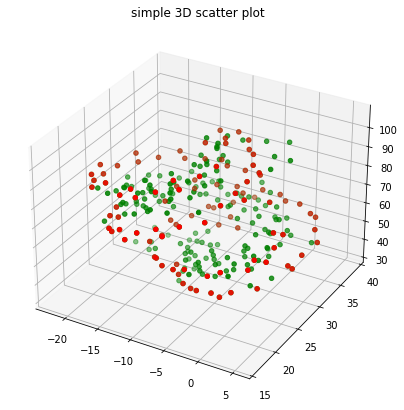

In [20]:
#plot molecule with its boundary points
for i in range(0,len(boundary_pts_c)):
    np.array(bx.append(boundary_pts_c[i][0]))
    np.array(by.append(boundary_pts_c[i][1]))
    np.array(bz.append(boundary_pts_c[i][2]))
for i in range(0,len(boundary_pts_d)):
    np.array(bx.append(boundary_pts_d[i][0]))
    np.array(by.append(boundary_pts_d[i][1]))
    np.array(bz.append(boundary_pts_d[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

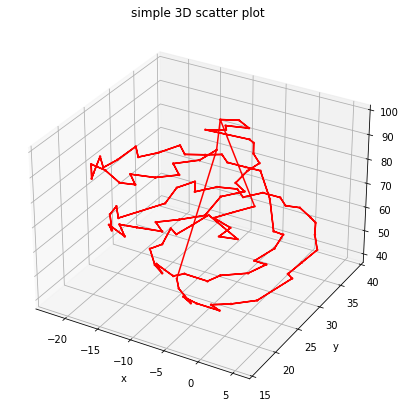

In [22]:
# Just the boundary plot 
fig2 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=2)
plt.title("simple 3D scatter plot")
ax.plot(bx,by,bz,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
#get spline data
max_neighbour_pts = 5
spline = []
bndry_pts = boundary_points[:]
total_points_length = len(bndry_pts)
# print(bndry_pts)
# for i in range(0,total_points_length):
for i in bndry_pts:
    neighbours_array = []
    tot_neighbour_pts = 0
    #thee is thy's first neighbour
#     neighbours_array.append(bndry_pts[i])
    neighbours_array.append(i)
    for j in bndry_pts:
#         print(len(bndry_pts))
        dis = distance(i,j)
#         print(dis)
        if(dis<20 and dis>3 and tot_neighbour_pts<=max_neighbour_pts):
            neighbours_array.append(j)
            tot_neighbour_pts = tot_neighbour_pts + 1
            del bndry_pts[bndry_pts.index(j)]
    if(len(neighbours_array)>0):
        #calculate centroid for the neighbours
#         print("neighbours")
#         print(bndry_pts.index(i))
        print(neighbours_array)
        centre = centroid(neighbours_array)
        print(centre)
        print("\n")
        spline.append(centre)
    del bndry_pts[bndry_pts.index(i)]

[[-8.391, 38.9, 50.682, 1, 'C'], [-10.625, 37.276, 49.12, 2, 'C'], [-9.454, 34.962, 47.225, 4, 'C'], [-7.32, 33.485, 46.585, 6, 'C'], [-13.614, 32.22, 49.615, 8, 'C'], [-14.651, 29.147, 52.793, 14, 'C'], [-13.741, 23.535, 54.625, 20, 'C']]
[-11.114, 32.789, 50.092]


[[-10.081, 33.23, 45.954, 5, 'C'], [-12.233, 35.177, 48.936, 3, 'C'], [-12.265, 34.066, 52.04, 7, 'C'], [-13.988, 26.408, 51.293, 15, 'C'], [-9.32, 20.074, 54.299, 22, 'C'], [-7.073, 19.261, 56.533, 28, 'C'], [-15.036, 28.534, 64.059, 194, 'D']]
[-11.428, 28.107, 53.302]


[[-10.135, 20.026, 57.569, 27, 'C'], [-14.213, 29.703, 49.613, 9, 'C'], [-4.898, 18.563, 60.544, 33, 'C'], [0.037, 18.98, 63.319, 40, 'C'], [4.015, 22.833, 64.169, 42, 'C'], [3.849, 24.825, 66.993, 47, 'C'], [2.975, 25.932, 71.351, 53, 'C']]
[-2.624, 22.98, 61.937]


[[3.159, 21.556, 67.237, 46, 'C'], [-1.861, 19.029, 59.28, 34, 'C'], [3.55, 27.202, 68.243, 48, 'C'], [-4.575, 34.329, 76.18, 65, 'C'], [-1.37, 26.014, 83.741, 155, 'D'], [-3.508, 20.817, 81

In [375]:
# #get spline data
# spline = []
# bndry_pts = boundary_points[:]
# total_points_length = len(bndry_pts)
# # for i in range(0,total_points_length):
# i = 0
# while i<len(bndry_pts):
#     print("len")
#     print(len(bndry_pts))
#     print(i)
#     neighbours_array = []
#     #thee is thy's first neighbour
#     neighbours_array.append(bndry_pts[i])
#     j = i+1
#     while(j<len(bndry_pts)):
# #         print(len(bndry_pts))
#         dis = distance(bndry_pts[i],bndry_pts[j])
#         if(dis<10):
#             neighbours_array.append(bndry_pts[j])
# #             del bndry_pts[j]
#             total_points_length = total_points_length - 1
#         j = j+1
#     if(len(neighbours_array)>0):
#         #calculate centroid for the neighbours
#         centre = centroid(neighbours_array)
#         spline.append(centre)
# #     del bndry_pts[i]
#     i = j

[[-11.114, 32.789, 50.092], [-11.428, 28.107, 53.302], [-2.624, 22.98, 61.937], [-1.807, 23.74, 73.839], [-13.994, 31.533, 77.072], [-17.405, 26.906, 81.195], [-12.793, 23.167, 91.215], [-9.072, 30.805, 89.875], [-5.113, 26.414, 87.84], [-10.284, 19.919, 73.412], [-11.167, 30.121, 62.663], [-0.275, 31.952, 57.465], [-1.574, 26.386, 49.351]]


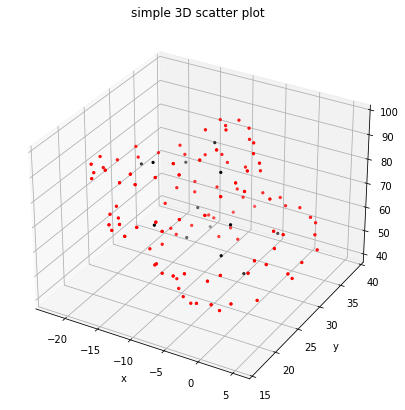

In [24]:
#Plot spine of molecule
#initialize arrays to plot the spine coordinates - centroidal axis
spline_x = []
spline_y = []
spline_z = []

print(spline)
for i in range(0,len(spline)):
    np.array(spline_x.append(spline[i][0]))
    np.array(spline_y.append(spline[i][1]))
    np.array(spline_z.append(spline[i][2]))
fig3 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=5)
ax.scatter3D(spline_x,spline_y,spline_z, color = "black",linestyle='-',s=5)
# ax.plot(spline_x,spline_y,spline_z, color='black')

plt.title("simple 3D scatter plot")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
count =  271
ct = 43
for item in spline:
#     print(item[0])
    print("ATOM    "+str(count)+" CENT P   G  "+str(ct)+"      "+str(item[0])+"  "+str(item[1])+
          "  "+str(item[2])+"  1.00  0.00")
    count = count + 1
    ct = ct+1

ATOM    271 CENT P   G  43      -11.114  32.789  50.092  1.00  0.00
ATOM    272 CENT P   G  44      -11.428  28.107  53.302  1.00  0.00
ATOM    273 CENT P   G  45      -2.624  22.98  61.937  1.00  0.00
ATOM    274 CENT P   G  46      -1.807  23.74  73.839  1.00  0.00
ATOM    275 CENT P   G  47      -13.994  31.533  77.072  1.00  0.00
ATOM    276 CENT P   G  48      -17.405  26.906  81.195  1.00  0.00
ATOM    277 CENT P   G  49      -12.793  23.167  91.215  1.00  0.00
ATOM    278 CENT P   G  50      -9.072  30.805  89.875  1.00  0.00
ATOM    279 CENT P   G  51      -5.113  26.414  87.84  1.00  0.00
ATOM    280 CENT P   G  52      -10.284  19.919  73.412  1.00  0.00
ATOM    281 CENT P   G  53      -11.167  30.121  62.663  1.00  0.00
ATOM    282 CENT P   G  54      -0.275  31.952  57.465  1.00  0.00
ATOM    283 CENT P   G  55      -1.574  26.386  49.351  1.00  0.00


##### ------------------------------------------------ Function definitions --------------------------------------------

In [12]:
def find_neighbour_density(point_A,set_of_points):
    neighbours = []
    for point_B in set_of_points:
        if(point_A != point_B):
            dis = distance(point_A,point_B)
            if(dis < 10):
                neighbours.append(point_B)
    return {"Point":point_A,"count":len(neighbours)}

In [13]:
def distance(point_A,point_B):
    x1 = float(point_A[0])
    y1 = float(point_A[1])
    z1 = float(point_A[2])
    x2 = float(point_B[0])
    y2 = float(point_B[1])
    z2 = float(point_B[2])
    dis = math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2) )
    return dis

In [14]:
def centroid(points):
    sum_x = 0.0
    sum_y = 0.0
    sum_z = 0.0
    l = float(len(points))
    for point in points:
        sum_x = sum_x + point[0]
        sum_y = sum_y + point[1]
        sum_z = sum_z + point[2]
    return [round(sum_x/l,3),round(sum_y/l,3),round(sum_z/l,3)]

In [15]:
def return_grid_coordinates(df):
    x_max = df['x'][0]
    y_max = df['y'][0]
    z_max = df['z'][0]

    x_min = df['x'][0]
    y_min = df['y'][0]
    z_min = df['z'][0]

    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate > x_max):
            x_max = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate > y_max):
            y_max = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate > z_max):
            z_max = z_coordinate
    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate < x_min):
            x_min = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate < y_min):
            y_min = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate < z_min):
            z_min = z_coordinate
    return ([x_min,x_max,y_min,y_max,z_min,z_max])

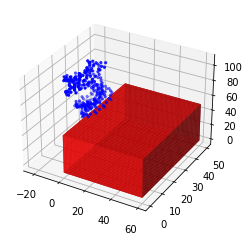

In [11]:

# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Create axis
axes = [60, 50, 50]
 
# Create Data
data = np.ones(axes, dtype=np.bool)
 
# Control Transparency
alpha = 0.9
 
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
 
colors[:] = [1, 0, 0, alpha]  # red
 
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)
# ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(x,y,z, color = "blue",s=5)

In [10]:
def midpoint(point_a,point_b):
    x = round((point_a[0]+point_b[0])/2.0,3)
    y = round((point_a[1]+point_b[1])/2.0,3)
    z = round((point_a[2]+point_b[2])/2.0,3)
    return [x,y,z]

In [459]:
x_cube , y_cube , z_cube = np.indices((100,100,100))
# cube1 = 